In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [54]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [55]:
df = pd.read_csv("C:\\Users\\Lenar\\PycharmProjects\\python-parser-cian\\data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))
df["Author"] = (df["Author"].astype(str))

df.head()

,How_many_rooms,All_floors,Floor,Link,Square_meters,Street,Price_per_month,Author,Commissions %,Price_per_meters
0,4,16,9,https://kazan.cian.ru/rent/flat/237818882/,186,Sibgata Hakima,100000,ID 305100,50,537.634409
1,2,18,12,https://kazan.cian.ru/rent/flat/244424052/,62,Sibgata Hakima,30000,ID 305100,50,483.870968
2,2,12,5,https://kazan.cian.ru/rent/flat/243318735/,75,Dostoevskogo,30000,ID 305100,50,400.000000
3,3,9,5,https://kazan.cian.ru/rent/flat/236848944/,110,Tovarischeskaja,50000,ID 305100,50,454.545455
4,2,5,2,https://kazan.cian.ru/rent/flat/246525819/,65,Bol'shaja Krasnaja,30000,ID 305100,50,461.538462


### Отбросим некоторые признаки

In [56]:
del df['Link']
del df['Commissions %']
del df['Street']
del df['Price_per_month']

df.head()

,How_many_rooms,All_floors,Floor,Square_meters,Author,Price_per_meters
0,4,16,9,186,ID 305100,537.634409
1,2,18,12,62,ID 305100,483.870968
2,2,12,5,75,ID 305100,400.000000
3,3,9,5,110,ID 305100,454.545455
4,2,5,2,65,ID 305100,461.538462


### Преобразуем нечисловые признаки в числовые

In [58]:
enc = LabelEncoder()
df.iloc[:,4] = enc.fit_transform(df.iloc[:,4])

df.head()

,How_many_rooms,All_floors,Floor,Square_meters,Author,Price_per_meters
0,4,16,9,186,48,537.634409
1,2,18,12,62,48,483.870968
2,2,12,5,75,48,400.000000
3,3,9,5,110,48,454.545455
4,2,5,2,65,48,461.538462


### Построим гистаграмму распределения объявлений

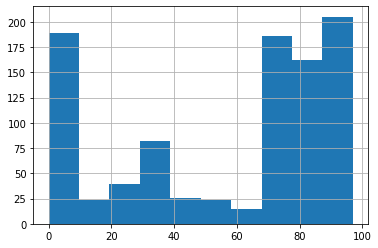

In [59]:
df['Author'].hist()

#### Видно, что довольно много людей имеют по несколько сотен объявлений (от 150 и более)

### Применим линейную модель

MSE: 14043.432
RMSE: 118.505
MAE: 78.800


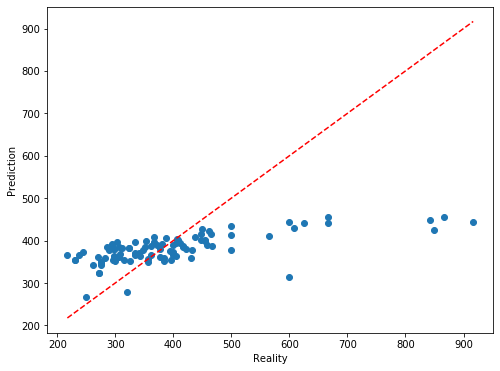

In [60]:
train_data, test_data, train_labels, test_labels = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))


### Также применим линейную модель, но предварительно удалив ещё один признак

In [61]:
df2 = df.copy()
df2.head()

,How_many_rooms,All_floors,Floor,Square_meters,Author,Price_per_meters
0,4,16,9,186,48,537.634409
1,2,18,12,62,48,483.870968
2,2,12,5,75,48,400.000000
3,3,9,5,110,48,454.545455
4,2,5,2,65,48,461.538462


In [62]:
del df2['Author']

df2.head()

,How_many_rooms,All_floors,Floor,Square_meters,Price_per_meters
0,4,16,9,186,537.634409
1,2,18,12,62,483.870968
2,2,12,5,75,400.000000
3,3,9,5,110,454.545455
4,2,5,2,65,461.538462


MSE: 14361.682
RMSE: 119.840
MAE: 80.204


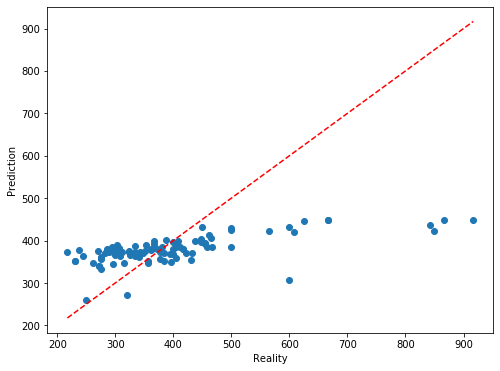

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size = 0.1, random_state=0)
model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))
